<a href="https://colab.research.google.com/github/Kriti-be21/Stock-Price-Prediction/blob/main/MSFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pip install quandl

In [8]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [9]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import urllib
from bs4 import BeautifulSoup
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [10]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from time import time

import matplotlib.ticker as tkr
%matplotlib inline
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

# Historic Data-set Collection

In [11]:
quandl.ApiConfig.api_key = '58nMn45N8WncsaoZD1FS'
selected                 = ["AAPL","CSCO","INTC","MSFT"]
df1                      = quandl.get_table('WIKI/PRICES',
                                             ticker = selected,
                                             qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                                             date = { 'gte': '2010-1-1', 'lte': '2019-12-31' },
                                             paginate = True)
print(df1.shape)
df1.head()

(8282, 3)


,date,ticker,adj_close
None,,,
0,2018-03-27,MSFT,89.47
1,2018-03-26,MSFT,93.78
2,2018-03-23,MSFT,87.18
3,2018-03-22,MSFT,89.79
4,2018-03-21,MSFT,92.48


In [12]:
df1 = df1.pivot(columns = 'ticker',index = "date",values = "adj_close")
df1 = pd.DataFrame(df1.to_records()).rename(columns={'date':'time'})
df1.head()


,time,AAPL,CSCO,INTC,MSFT
0,2010-01-04,27.503268,20.403200,16.019937,25.153472
1,2010-01-05,27.550818,20.312299,16.012265,25.161599
2,2010-01-06,27.112585,20.180079,15.958558,25.007183
3,2010-01-07,27.062465,20.270980,15.805111,24.748741
4,2010-01-08,27.242385,20.378409,15.981575,24.917785


In [13]:
df2 = df1.sort_values("time")
df2 = df2.set_index("time")
df2.tail()

,AAPL,CSCO,INTC,MSFT
time,,,,
2018-03-21,171.270,44.31,51.56,92.48
2018-03-22,168.845,43.07,50.83,89.79
2018-03-23,164.940,42.42,49.36,87.18
2018-03-26,172.770,44.06,52.48,93.78
2018-03-27,168.340,42.68,51.19,89.47


In [19]:
df2.to_pickle("/content/drive/MyDrive/historic_prices1.pkl")

In [20]:
df3 = pd.read_pickle("/content/drive/MyDrive/historic_prices1.pkl")
df3.head()

,AAPL,CSCO,INTC,MSFT
time,,,,
2010-01-04,27.503268,20.403200,16.019937,25.153472
2010-01-05,27.550818,20.312299,16.012265,25.161599
2010-01-06,27.112585,20.180079,15.958558,25.007183
2010-01-07,27.062465,20.270980,15.805111,24.748741
2010-01-08,27.242385,20.378409,15.981575,24.917785


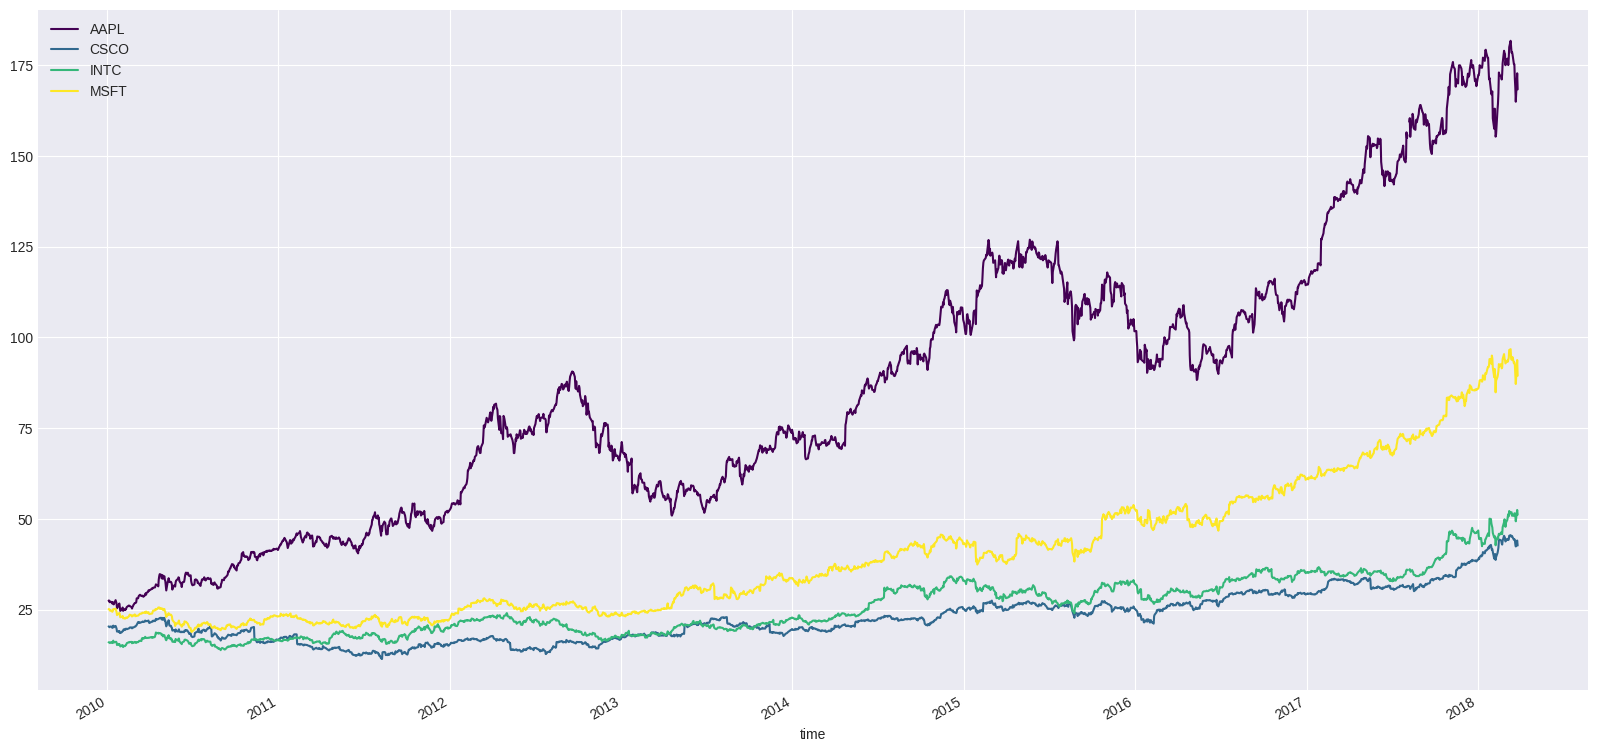

In [21]:
plt.style.use('seaborn-dark')

df3.plot(cmap= "viridis",figsize=(20,10))
plt.grid()
plt.show()

# Sentiment Analysis

In [22]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
df2 = pd.read_pickle("/content/drive/MyDrive/custom.pkl")

In [25]:
df2

,n_of_page,principal_url,internal_urls,internals_dates,internals_text
0,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/press-releases-p...,"Oct 04, 2021",NEW YORK — Telstra today announced it is a sel...
1,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/business-pmn/mic...,"Nov 02, 2021",Microsoft Corp on Tuesday announced a new roun...
2,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/technology/tech-news...,"Mar 05, 2021",Although the flagship launch at Microsoft Igni...
3,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/globe-newswire/quisi...,"Jul 08, 2021","TORONTO, July 08, 2021 (GLOBE NEWSWIRE) — Quis..."
4,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/investing/microsoft-...,"Oct 27, 2021",A blowout first quarter has brought Microsoft ...
...,...,...,...,...,...
9875,988,https://financialpost.com/search/?search_text=...,https://financialpost.com/women-of-power/canad...,"Dec 02, 2014",Authentic leaders know themselves — their stre...
9876,988,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/press-releases-p...,"Aug 13, 2019",Fiscal 2019 Net Income Increases 144% Over Pri...
9877,988,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/press-releases-p...,"Nov 12, 2019",Continued Momentum in Enterprise and Governmen...
9878,988,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/press-releases-p...,"Nov 09, 2020",Q1 Results include Record 11% revenue growth; ...


In [26]:
text_1 = df2["internals_text"]
text_1

0       NEW YORK — Telstra today announced it is a sel...
1       Microsoft Corp on Tuesday announced a new roun...
2       Although the flagship launch at Microsoft Igni...
3       TORONTO, July 08, 2021 (GLOBE NEWSWIRE) — Quis...
4       A blowout first quarter has brought Microsoft ...
                              ...                        
9875    Authentic leaders know themselves — their stre...
9876    Fiscal 2019 Net Income Increases 144% Over Pri...
9877    Continued Momentum in Enterprise and Governmen...
9878    Q1 Results include Record 11% revenue growth; ...
9879    HOUSTON — Schlumberger Limited (NYSE: SLB) tod...
Name: internals_text, Length: 9825, dtype: object

In [27]:
text_1[0]

'NEW YORK — Telstra today announced it is a selected carrier for Microsoft Azure Peering Service, a networking service that enhances customer connectivity, and Operator Connect for Microsoft Teams, a new programmatic approach to operator-provided calling in Teams.  Today’s announcement builds on the long-standing relationship between Telstra and Microsoft to help enhance connectivity to Microsoft cloud services and provide an integrated calling experience via Teams. '

In [28]:
def split_by_dot(x):
    return(x.split("."))

df2["internals_text_split_by_dot"] = df2["internals_text"].apply(split_by_dot)

df2["internals_text_split_by_dot"]

0       [NEW YORK — Telstra today announced it is a se...
1       [Microsoft Corp on Tuesday announced a new rou...
2       [Although the flagship launch at Microsoft Ign...
3       [TORONTO, July 08, 2021 (GLOBE NEWSWIRE) — Qui...
4       [A blowout first quarter has brought Microsoft...
                              ...                        
9875    [Authentic leaders know themselves — their str...
9876    [Fiscal 2019 Net Income Increases 144% Over Pr...
9877    [Continued Momentum in Enterprise and Governme...
9878    [Q1 Results include Record 11% revenue growth;...
9879    [HOUSTON — Schlumberger Limited (NYSE: SLB) to...
Name: internals_text_split_by_dot, Length: 9825, dtype: object

In [29]:
df2["time"] = pd.to_datetime(df2["internals_dates"])
df2.head()

,n_of_page,principal_url,internal_urls,internals_dates,internals_text,internals_text_split_by_dot,time
0,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/press-releases-p...,"Oct 04, 2021",NEW YORK — Telstra today announced it is a sel...,[NEW YORK — Telstra today announced it is a se...,2021-10-04
1,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/business-pmn/mic...,"Nov 02, 2021",Microsoft Corp on Tuesday announced a new roun...,[Microsoft Corp on Tuesday announced a new rou...,2021-11-02
2,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/technology/tech-news...,"Mar 05, 2021",Although the flagship launch at Microsoft Igni...,[Although the flagship launch at Microsoft Ign...,2021-03-05
3,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/globe-newswire/quisi...,"Jul 08, 2021","TORONTO, July 08, 2021 (GLOBE NEWSWIRE) — Quis...","[TORONTO, July 08, 2021 (GLOBE NEWSWIRE) — Qui...",2021-07-08
4,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/investing/microsoft-...,"Oct 27, 2021",A blowout first quarter has brought Microsoft ...,[A blowout first quarter has brought Microsoft...,2021-10-27


In [30]:
df2 = df2.sort_values("time")
df2 = df2.set_index("time")
df2.head()

,n_of_page,principal_url,internal_urls,internals_dates,internals_text,internals_text_split_by_dot
time,,,,,,
2011-11-21,135,https://financialpost.com/search/?search_text=...,https://financialpost.com/technology/today-in-...,"Nov 21, 2011",Tech firms making news this morning: Research ...,[Tech firms making news this morning: Research...
2011-11-22,75,https://financialpost.com/search/?search_text=...,https://financialpost.com/legal-post/bill-gate...,"Nov 22, 2011",Microsoft Corp. Chairman Bill Gates faced more...,"[Microsoft Corp, Chairman Bill Gates faced mo..."
2011-11-22,570,https://financialpost.com/search/?search_text=...,https://financialpost.com/investing/oppenheime...,"Nov 22, 2011","By Marius Bosch, Clara Ferreira-Marques and Da...","[By Marius Bosch, Clara Ferreira-Marques and D..."
2011-11-22,569,https://financialpost.com/search/?search_text=...,https://financialpost.com/investing/oppenheime...,"Nov 22, 2011","By Marius Bosch, Clara Ferreira-Marques and Da...","[By Marius Bosch, Clara Ferreira-Marques and D..."
2011-11-22,634,https://financialpost.com/search/?search_text=...,https://financialpost.com/technology/today-in-...,"Nov 22, 2011",Tech firms making news this morning: Citrix Sy...,[Tech firms making news this morning: Citrix S...


In [31]:
df2.to_pickle("/content/drive/MyDrive/msft_with_time.pkl")

In [32]:
df2 = pd.read_pickle("/content/drive/MyDrive/msft_with_time.pkl")
df2.dropna(inplace=True)

In [33]:
def sentimental_analysis_by_phrase(y):

    y = list(map(lambda x: analyser.polarity_scores(x)["compound"],y))
    y = np.array(y)
    y = y[y != 0]
    return(y)


In [34]:

text_2 = df2["internals_text_split_by_dot"][0]
text_2

['Tech firms making news this morning: Research In Motion Ltd',
 ', Microsoft Corp',
 ', LivingSocial Inc',
 ', Facebook Inc',
 ', LinkedIn Corp',
 ' and Groupon Inc',
 'BlackBerry 7 sales sputter after strong start , [ CNET ]:Bill Gates to defend Microsoft in Novell court case on Monday , [WinRumors]:LivingSocial set to raise near US$200-million , [ New York Times ]:Why Facebook’s seamless sharing is wrong , [ ReadWriteWeb ]:Secretive North Korea opens up to cellphones , [Reuters]:LinkedIn’s Reid Hoffman on Groupon’s big advantage: Big data , [ Fast Company ]:The Internet will get a peer review layer next year , [ ReadWriteWeb ]:']

In [35]:
sentimental_analysis_by_phrase(text_2)

array([0.34])

In [36]:
df2["sentimental_analysis_split_by_dot"] = df2["internals_text_split_by_dot"].apply(sentimental_analysis_by_phrase)

df2["sentimental_analysis_split_by_dot"]

time
2011-11-21              [0.34]
2011-11-22           [-0.3612]
2011-11-22                  []
2011-11-22                  []
2011-11-22           [-0.5859]
                    ...       
2021-11-17    [0.8834, 0.8402]
2021-11-17            [0.1027]
2021-11-17    [0.4215, 0.4588]
2021-11-17    [0.1027, 0.5859]
2021-11-17      [0.872, 0.872]
Name: sentimental_analysis_split_by_dot, Length: 9825, dtype: object

In [37]:
df2.dropna(inplace=True)

In [38]:
df2["sentimental_analysis_split_by_dot_average"] = df2["sentimental_analysis_split_by_dot"].apply(np.mean)
df2["sentimental_analysis_split_by_dot_average"]

time
2011-11-21    0.34000
2011-11-22   -0.36120
2011-11-22        NaN
2011-11-22        NaN
2011-11-22   -0.58590
               ...   
2021-11-17    0.86180
2021-11-17    0.10270
2021-11-17    0.44015
2021-11-17    0.34430
2021-11-17    0.87200
Name: sentimental_analysis_split_by_dot_average, Length: 9825, dtype: float64

In [39]:
def sentimental_analysis(y):

    return(analyser.polarity_scores(y)["compound"])


In [40]:
df2["sentimental_analysis_complete_text"] = df2["internals_text"].apply(sentimental_analysis)

df2["sentimental_analysis_complete_text"]

time
2011-11-21    0.3400
2011-11-22   -0.3612
2011-11-22    0.0000
2011-11-22    0.0000
2011-11-22   -0.5859
               ...  
2021-11-17    0.9601
2021-11-17    0.1027
2021-11-17    0.7003
2021-11-17    0.6369
2021-11-17    0.9628
Name: sentimental_analysis_complete_text, Length: 9825, dtype: float64

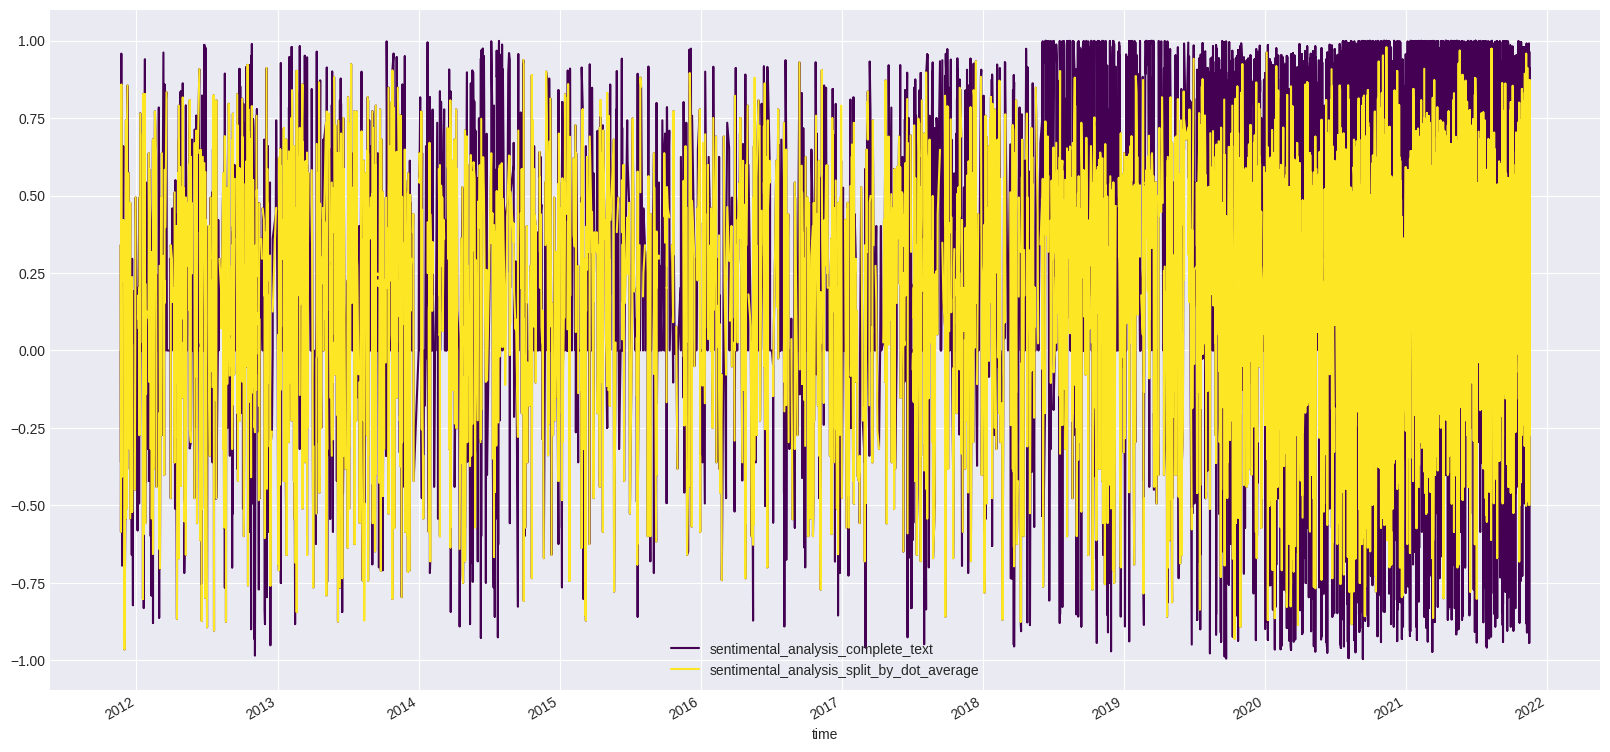

In [41]:
plt.style.use('seaborn-dark')
df2[["sentimental_analysis_complete_text","sentimental_analysis_split_by_dot_average"]].plot(cmap = "viridis",linestyle='-',figsize = (20,10))
plt.grid()
plt.show()

In [43]:
df2.to_pickle("/content/drive/MyDrive/msft_senti.pkl")

# Combinging the 2 datasets (Prices and sentiment)

In [44]:
df_text = pd.read_pickle("/content/drive/MyDrive/msft_senti.pkl")


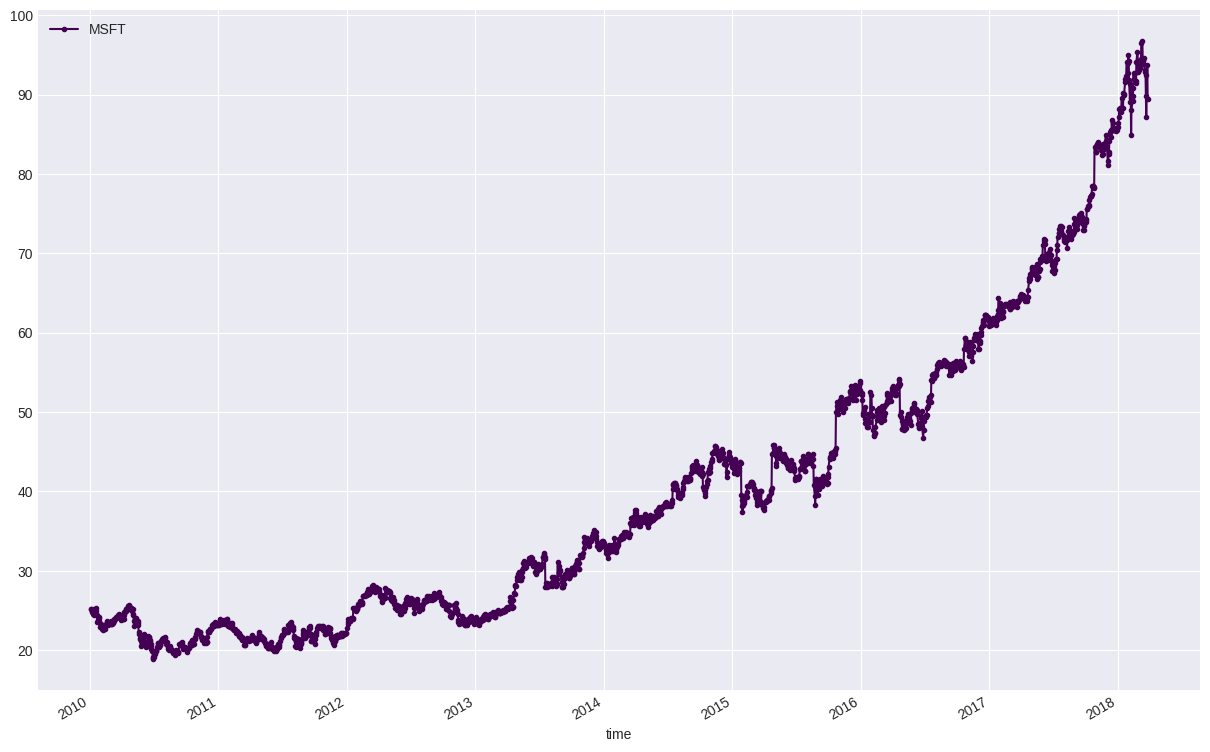

In [45]:
df_values = pd.read_pickle("/content/drive/MyDrive/historic_prices1.pkl")
#df_values.head()


microsoft_df = df_values[["MSFT"]]
microsoft_df.plot(cmap = "viridis",linestyle='-',figsize = (15,10),marker='.')
plt.grid()
plt.show()

In [46]:
X = df_text["sentimental_analysis_split_by_dot_average"].copy()
X = X.reset_index(drop= False)
X["time"] = pd.to_datetime(X["time"],errors = 'coerce', format = '%Y-%m-%dT%H:%M',infer_datetime_format = True, cache = True,utc=True)
X["time"] = pd.to_datetime(X["time"])

X = X.set_index(pd.DatetimeIndex(X["time"]))
X.set_index("time")
X.shape

(9825, 2)

In [47]:
df_text = pd.read_pickle("/content/drive/MyDrive/msft_senti.pkl")
#df_text_gensim.head()
names     = df_text.columns
df_final = df_text[names[5:]].copy()

df_final = df_final.set_index(X.index)

X = pd.concat([X,df_final],axis= 1)

In [48]:
X = X.drop(["time"],axis= 1)

In [49]:
X = X.resample('1d').first()
X = X.tz_convert(None)


In [50]:
y = microsoft_df.copy()
y.shape

(2071, 1)

In [51]:
result = pd.concat([X,y], axis=1,join='inner')
result.shape


(1595, 6)

In [52]:
result = result.fillna(method='ffill', inplace=False)



In [53]:
result.shape

(1595, 6)

In [54]:
result.head()

,sentimental_analysis_split_by_dot_average,internals_text_split_by_dot,sentimental_analysis_split_by_dot,sentimental_analysis_split_by_dot_average,sentimental_analysis_complete_text,MSFT
time,,,,,,
2011-11-21,0.3400,[Tech firms making news this morning: Research...,[0.34],0.3400,0.3400,21.289229
2011-11-22,-0.3612,"[Microsoft Corp, Chairman Bill Gates faced mo...",[-0.3612],-0.3612,-0.3612,21.110400
2011-11-23,0.8585,"[This is the second in the ongoing series, “Pr...","[0.8519, 0.8651]",0.8585,0.9582,20.837898
2011-11-25,-0.4077,[What will be next year’s hottest technology t...,"[-0.3566, -0.4588]",-0.4077,-0.6946,20.693131
2011-11-28,0.2236,[Tech firms making news this morning: Best Buy...,"[0.6369, 0.5106, -0.4767]",0.2236,0.6597,21.178525


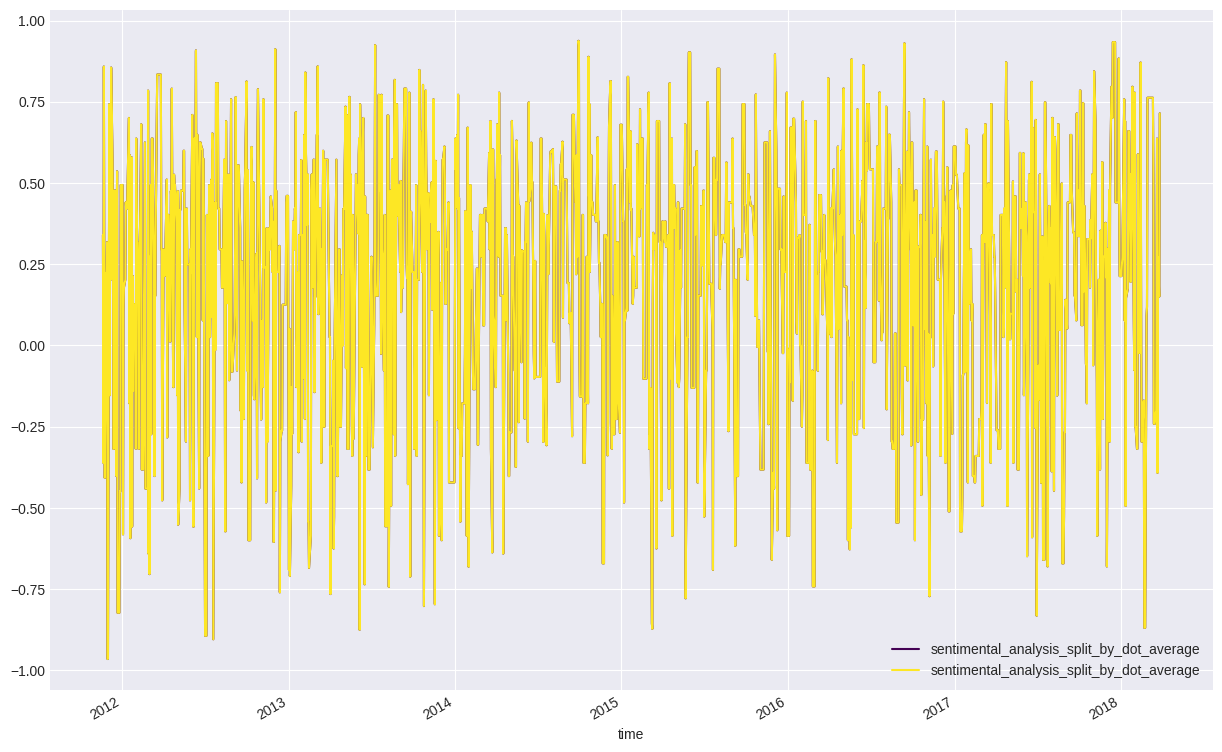

In [55]:
result[["sentimental_analysis_split_by_dot_average"]].plot(cmap = "viridis",linestyle='-',figsize = (15,10))
plt.grid()
plt.show()

In [56]:
result.to_pickle("/content/drive/MyDrive/msft_importable.pkl")

# Final Modeling for LSTM w/o Sentiment Analysis

In [57]:
result= pd.read_pickle("/content/drive/MyDrive/msft_importable.pkl")

# original time serie (Y)
y = result.MSFT.values
y = y.astype('float32')
y = np.reshape(y, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(y)



# training and testing settings (size)
percent_of_training = 0.8
train_size = int(len(y) * percent_of_training)
test_size = len(y) - train_size
#
train_y, test_y = y[0:train_size,:], y[train_size:len(y),:]


def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [58]:
look_back = 30


# features of the original time serie (y)
X_train_features_1, y_train = create_dataset(train_y, look_back)
X_test_features_1, y_test = create_dataset(test_y, look_back)




# join the all the features in one
## reshape arrays
X_train_features = np.reshape(X_train_features_1, (X_train_features_1.shape[0], 1, X_train_features_1.shape[1]))
X_test_features  = np.reshape(X_test_features_1, (X_test_features_1.shape[0], 1, X_test_features_1.shape[1]))


In [59]:
model = Sequential()
temp_x= X_train_features.shape[1]
temp_y =X_train_features.shape[2]
print(temp_y)

30


In [60]:
model.add(LSTM(200, input_shape=(X_train_features.shape[1], X_train_features.shape[2])))
model.add(Dropout(0.20))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               184800    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 185001 (722.66 KB)
Trainable params: 185001 (722.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:


history = model.fit(X_train_features,y_train, epochs=300, batch_size=25, validation_data=(X_test_features, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=0, shuffle=False)
train_predict = model.predict(X_train_features)
test_predict  = model.predict(X_test_features)

print('Train Mean Absolute Error:', mean_absolute_error(np.reshape(y_train,(y_train.shape[0],1)), train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(np.reshape(y_train,(y_train.shape[0],1)), train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(np.reshape(y_test,(y_test.shape[0],1)), test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(np.reshape(y_test,(y_test.shape[0],1)), test_predict[:,0])))

9/9 [==============================] - 0s 3ms/step
Train Mean Absolute Error: 0.018214136
Train Root Mean Squared Error: 0.022304147
Test Mean Absolute Error: 0.028108934
Test Root Mean Squared Error: 0.038344014


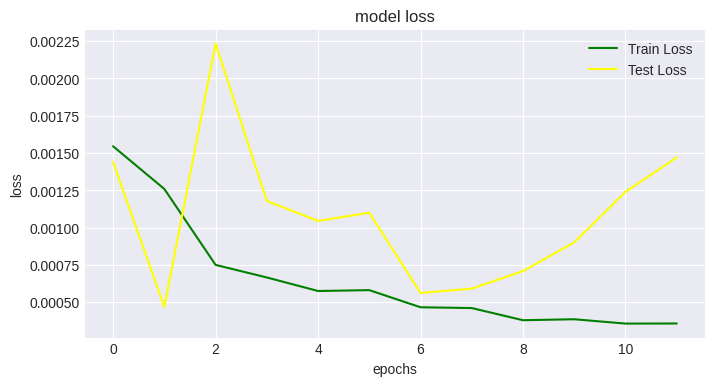

In [62]:
plt.figure(figsize=(8,4))
plt.style.use('seaborn-dark')

plt.plot(history.history['loss'], label='Train Loss',color="green")
plt.plot(history.history['val_loss'], label='Test Loss',color = "yellow")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.grid()

plt.show();

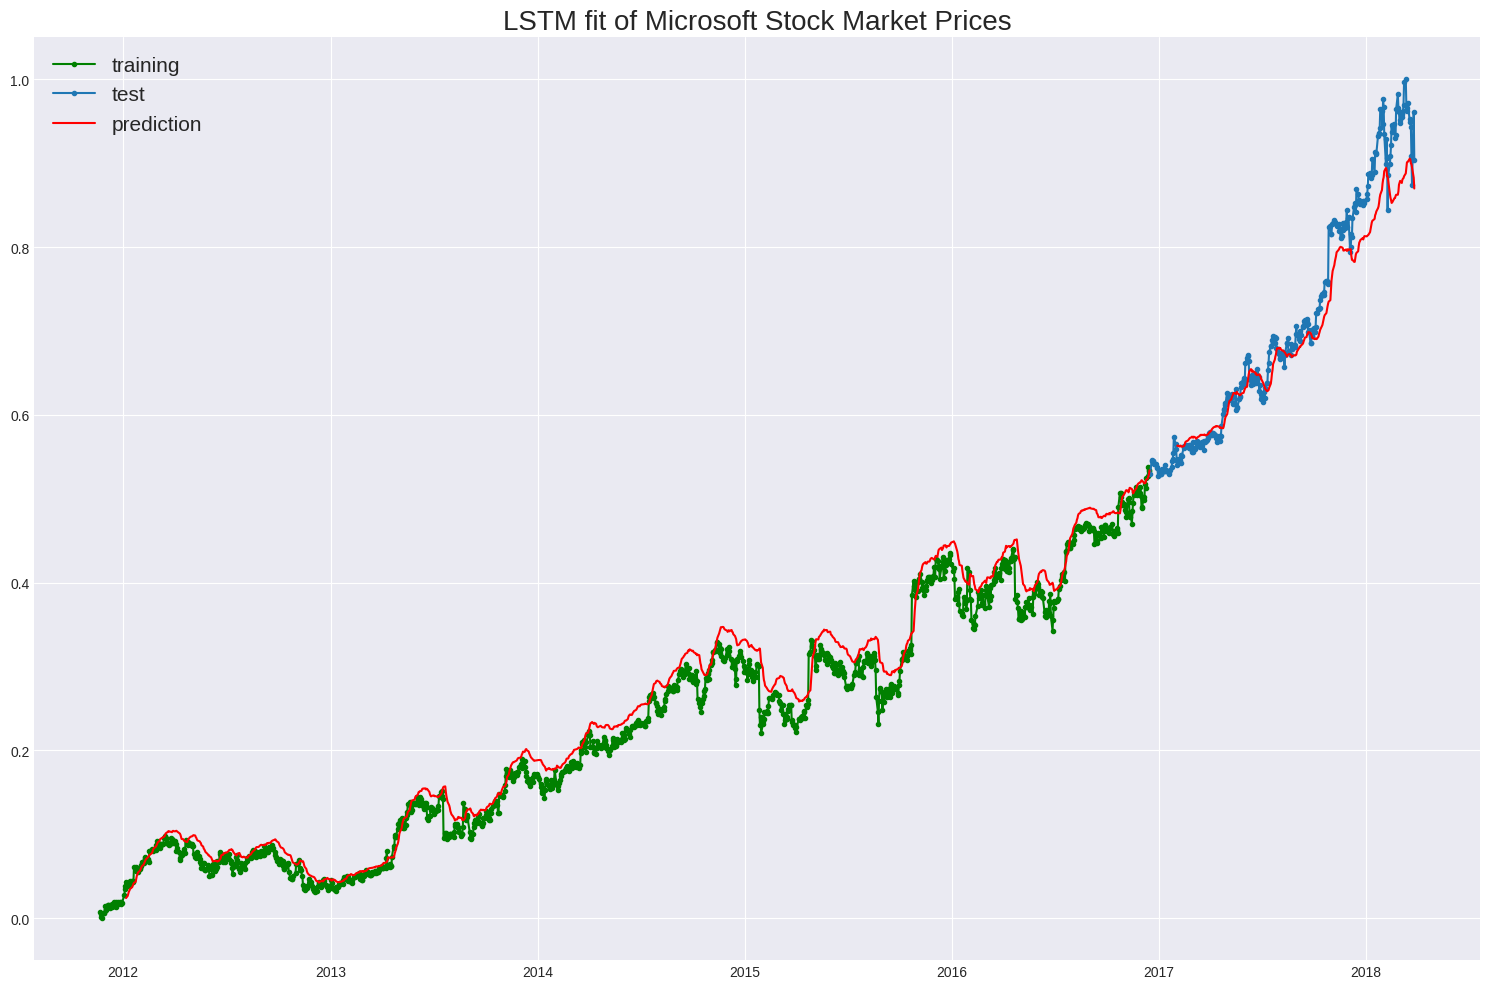

In [63]:
time_y_train = pd.DataFrame(data = train_y, index = result[0:train_size].index,columns= [""])
time_y_test  = pd.DataFrame(data = test_y, index = result[train_size:].index,columns= [""])

time_y_train_prediction = pd.DataFrame(data = train_predict, index = time_y_train[look_back+1:].index,columns= [""])
time_y_test_prediction  = pd.DataFrame(data = test_predict, index = time_y_test[look_back+1:].index,columns= [""])


plt.style.use('seaborn-dark')
plt.figure(figsize=(15,10))

plt.plot(time_y_train,label = "training",color ="green",marker='.')
plt.plot(time_y_test,label = "test",marker='.')
plt.plot(time_y_train_prediction,color="red",label = "prediction")
plt.plot(time_y_test_prediction,color="red")
plt.title("LSTM fit of Microsoft Stock Market Prices",size = 20)
plt.tight_layout()
sns.despine(top=True)
plt.ylabel('', size=15)
plt.xlabel('', size=15)
plt.legend(fontsize=15)
plt.grid()

plt.show();

# Modeling with sentiment Analysis

In [64]:
result= pd.read_pickle("/content/drive/MyDrive/msft_importable.pkl")

# original time serie (Y)
y = result.MSFT.values #numpy.ndarray
y = y.astype('float32')
y = np.reshape(y, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(y)


# extra information: features of the sentiment analysis
X = result.sentimental_analysis_split_by_dot_average.values
X = X.astype('float32')
X = np.reshape(X, (-1, 1))

# training and testing settings (size)
percent_of_training = 0.8
train_size = int(len(y) * percent_of_training)
test_size = len(y) - train_size
#
train_y, test_y = y[0:train_size,:], y[train_size:len(y),:]
train_x, test_x = X[0:train_size,:], X[train_size:train_size+test_size,:]



def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
test_x.shape

(319, 1)

In [65]:
look_back = 30


# features of the original time serie (y)
X_train_features_1, y_train = create_dataset(train_y, look_back)
X_test_features_1, y_test = create_dataset(test_y, look_back)


# calculate extra features in (X)
X_train_features_2, auxiliar_1 = create_dataset(train_x, look_back)
X_test_features_2, auxiliar_2 = create_dataset(test_x, look_back)


# join the all the features in one
## reshape arrays
X_train_features_1 = np.reshape(X_train_features_1, (X_train_features_1.shape[0], 1, X_train_features_1.shape[1]))
X_test_features_1  = np.reshape(X_test_features_1, (X_test_features_1.shape[0], 1, X_test_features_1.shape[1]))
X_train_features_2 = np.reshape(X_train_features_2, (X_train_features_2.shape[0], 1, X_train_features_2.shape[1]))
X_test_features_2  = np.reshape(X_test_features_2, (X_test_features_2.shape[0], 1, X_test_features_2.shape[1]))
## put all together
X_train_all_features = np.append(X_train_features_1,X_train_features_2,axis=1)
X_test_all_features = np.append(X_test_features_1,X_test_features_2,axis=1)


In [66]:
temp_x= X_train_features.shape[1]
temp_y =X_train_features.shape[2]
print(temp_x)

1


In [67]:
model = Sequential()
model.add(LSTM(200, input_shape=(X_train_all_features.shape[1], X_train_all_features.shape[2])))
model.add(Dropout(0.20))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train_all_features,y_train, epochs=300, batch_size=25, validation_data=(X_test_all_features, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=0, shuffle=False)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 200)               184800    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 185001 (722.66 KB)
Trainable params: 185001 (722.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
train_predict = model.predict(X_train_all_features)
test_predict  = model.predict(X_test_all_features)


print('Train Mean Absolute Error:', mean_absolute_error(np.reshape(y_train,(y_train.shape[0],1)), train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(np.reshape(y_train,(y_train.shape[0],1)), train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(np.reshape(y_test,(y_test.shape[0],1)), test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(np.reshape(y_test,(y_test.shape[0],1)), test_predict[:,0])))

9/9 [==============================] - 0s 4ms/step
Train Mean Absolute Error: 0.021536764
Train Root Mean Squared Error: 0.025913069
Test Mean Absolute Error: 0.040212557
Test Root Mean Squared Error: 0.047151946


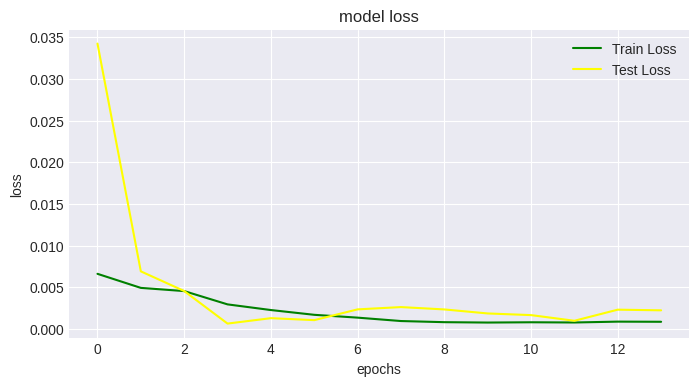

In [69]:
plt.figure(figsize=(8,4))
plt.style.use('seaborn-dark')


plt.plot(history.history['loss'], label='Train Loss',color="green")
plt.plot(history.history['val_loss'], label='Test Loss',color = "yellow")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.grid()

plt.show();

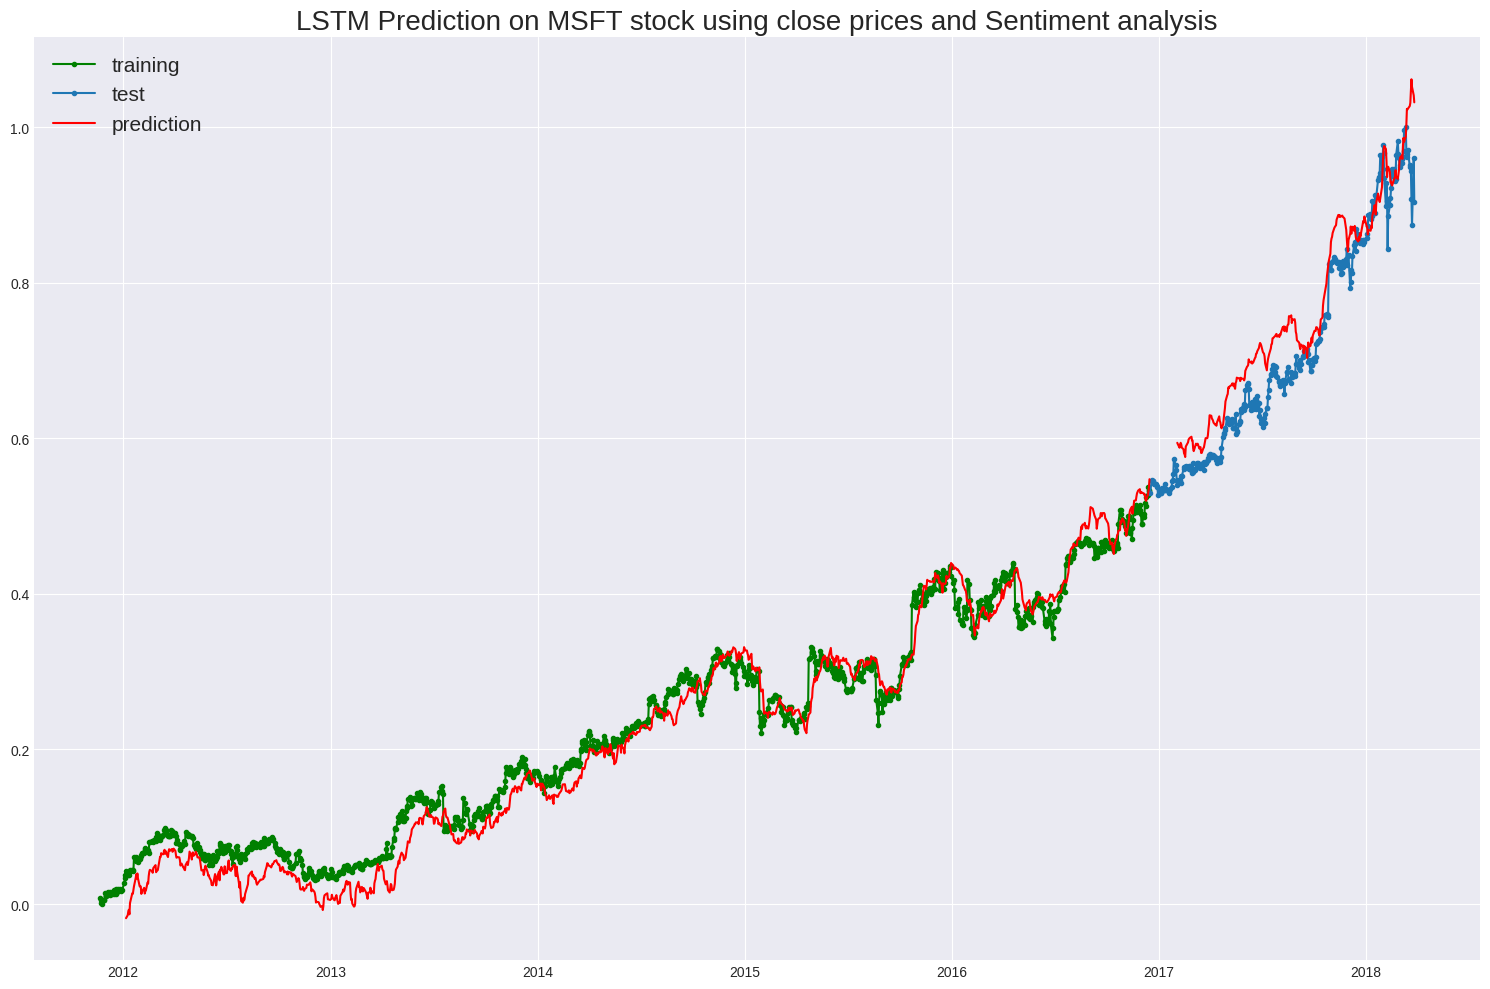

In [70]:
time_y_train = pd.DataFrame(data = train_y, index = result[0:train_size].index,columns= [""])
time_y_test  = pd.DataFrame(data = test_y, index = result[train_size:].index,columns= [""])

time_y_train_prediction = pd.DataFrame(data = train_predict, index = time_y_train[look_back+1:].index,columns= [""])
time_y_test_prediction  = pd.DataFrame(data = test_predict, index = time_y_test[look_back+1:].index,columns= [""])


plt.style.use('seaborn-dark')
plt.figure(figsize=(15,10))

plt.plot(time_y_train,label = "training",color ="green",marker='.')
plt.plot(time_y_test,label = "test",marker='.')
plt.plot(time_y_train_prediction,color="red",label = "prediction")
plt.plot(time_y_test_prediction,color="red")
plt.title("LSTM Prediction on MSFT stock using close prices and Sentiment analysis",size = 20)
plt.tight_layout()
sns.despine(top=True)
plt.ylabel('', size=15)
plt.xlabel('', size=15)
plt.legend(fontsize=15)
plt.grid()

plt.show();